In [63]:
def box_det_hea(input_path):
    name_data = input_path.split("/")[-1]
    #file reading:
    print('File Reading...')
    data = h5py.File(input_path,'r')
    data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
    info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
    info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
    labels = info_table['Label']
    readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
    fs = 10000 #Sampling Frequency
    print('data shape: ',readings.shape)
    prova=readings.drop([b'Ref'],axis=1)
    #prova=prova.iloc[0:750500, :]
    #prova=prova.iloc[:, :15]
    ref=readings[b'Ref']
    #ref=ref[0:750500]
    freqs, spectrogram = signal.welch(readings[b'Ref'].values, fs=10000, nfft=1024)
    noise_freq = freqs[spectrogram.argmax()]
    Q = 30
    b, a = scipy.signal.iirnotch(noise_freq, Q, fs)
    Q = 60
    b_2, a_2 = scipy.signal.iirnotch(2*noise_freq, Q, fs)
    channel = readings[b'Ref'].values
    pre_filtered_ref = scipy.signal.filtfilt(b, a, channel)
    pre_filtered_ref = scipy.signal.filtfilt(b_2, a_2, pre_filtered_ref) 
    ref=pre_filtered_ref

    #filtering:
    prova_rows = range(prova.shape[0])
    filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
    lowcut = 300
    highcut = 3000
    fs=10000
    order=8
    b,a=butter_bandpass(lowcut,highcut,fs,order=order)
    filt_ref=filtfilt(b,a,ref)
    print('Data Filtering:')
    for x in tqdm(range(prova.shape[1])):
        filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
    for electrode in prova.columns:
        filt_prova[electrode] = filt_prova[electrode] - filt_ref
    prova=filt_prova
    #detection:
    all_ind=[]
    print('Spike Detection: ')
    for i,electrode in enumerate(tqdm(prova.columns)):
        channel=prova[electrode]
        #ind=windowed_spike_detection(channel)
        ind,firing=this_spike_detection(channel)
        all_ind.append(ind)
        all_firing.append(firing)
    return all_firing

In [65]:
import glob
list_dir=glob.glob("/Users/Gaia_1/Desktop/allh5filestutto/*.h5")
all_firings=[]
for file in list_dir:
    file_name=input_path.split("/")[-1]
    if 'healthy' in file_name:
        firings=box_det_hea(file)
        all_firings.append(firings)

File Reading...
data shape:  (4503000, 60)
Data Filtering:


  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

39033  spikes detected;   firing rate: 86.68 Hz
39559  spikes detected;   firing rate: 87.85 Hz
39542  spikes detected;   firing rate: 87.81 Hz
39189  spikes detected;   firing rate: 87.03 Hz
40661  spikes detected;   firing rate: 90.30 Hz
27861  spikes detected;   firing rate: 61.87 Hz
29154  spikes detected;   firing rate: 64.74 Hz
25025  spikes detected;   firing rate: 55.57 Hz
28047  spikes detected;   firing rate: 62.29 Hz
27515  spikes detected;   firing rate: 61.10 Hz
25829  spikes detected;   firing rate: 57.36 Hz
25084  spikes detected;   firing rate: 55.71 Hz
23237  spikes detected;   firing rate: 51.60 Hz
20992  spikes detected;   firing rate: 46.62 Hz
16891  spikes detected;   firing rate: 37.51 Hz
23560  spikes detected;   firing rate: 52.32 Hz
24055  spikes detected;   firing rate: 53.42 Hz
22933  spikes detected;   firing rate: 50.93 Hz
24561  spikes detected;   firing rate: 54.54 Hz
23710  spikes detected;   firing rate: 52.65 Hz
23836  spikes detected;   firing rate: 5

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

12511  spikes detected;   firing rate: 34.66 Hz
12608  spikes detected;   firing rate: 34.93 Hz
12459  spikes detected;   firing rate: 34.51 Hz
12451  spikes detected;   firing rate: 34.49 Hz
12052  spikes detected;   firing rate: 33.39 Hz
15251  spikes detected;   firing rate: 42.25 Hz
9203  spikes detected;   firing rate: 25.49 Hz
4126  spikes detected;   firing rate: 11.43 Hz
11322  spikes detected;   firing rate: 31.36 Hz
21162  spikes detected;   firing rate: 58.62 Hz
4265  spikes detected;   firing rate: 11.81 Hz
4139  spikes detected;   firing rate: 11.47 Hz
4148  spikes detected;   firing rate: 11.49 Hz
4327  spikes detected;   firing rate: 11.99 Hz
3230  spikes detected;   firing rate: 8.95 Hz
4218  spikes detected;   firing rate: 11.68 Hz
4317  spikes detected;   firing rate: 11.96 Hz
3909  spikes detected;   firing rate: 10.83 Hz
4223  spikes detected;   firing rate: 11.70 Hz
4279  spikes detected;   firing rate: 11.85 Hz
5364  spikes detected;   firing rate: 14.86 Hz
6637  

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

6523  spikes detected;   firing rate: 17.55 Hz
6501  spikes detected;   firing rate: 17.49 Hz
6533  spikes detected;   firing rate: 17.58 Hz
6638  spikes detected;   firing rate: 17.86 Hz
6677  spikes detected;   firing rate: 17.96 Hz
26056  spikes detected;   firing rate: 70.10 Hz
9303  spikes detected;   firing rate: 25.03 Hz
17282  spikes detected;   firing rate: 46.49 Hz
11704  spikes detected;   firing rate: 31.49 Hz
24464  spikes detected;   firing rate: 65.82 Hz
6127  spikes detected;   firing rate: 16.48 Hz
5944  spikes detected;   firing rate: 15.99 Hz
6111  spikes detected;   firing rate: 16.44 Hz
6013  spikes detected;   firing rate: 16.18 Hz
5167  spikes detected;   firing rate: 13.90 Hz
6001  spikes detected;   firing rate: 16.14 Hz
6119  spikes detected;   firing rate: 16.46 Hz
6028  spikes detected;   firing rate: 16.22 Hz
8378  spikes detected;   firing rate: 22.54 Hz
5885  spikes detected;   firing rate: 15.83 Hz
11166  spikes detected;   firing rate: 30.04 Hz
9182  sp

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

10658  spikes detected;   firing rate: 29.43 Hz
10592  spikes detected;   firing rate: 29.24 Hz
10687  spikes detected;   firing rate: 29.51 Hz
10703  spikes detected;   firing rate: 29.55 Hz
10589  spikes detected;   firing rate: 29.24 Hz
20809  spikes detected;   firing rate: 57.45 Hz
5737  spikes detected;   firing rate: 15.84 Hz
19179  spikes detected;   firing rate: 52.95 Hz
8920  spikes detected;   firing rate: 24.63 Hz
22710  spikes detected;   firing rate: 62.70 Hz
4425  spikes detected;   firing rate: 12.22 Hz
4379  spikes detected;   firing rate: 12.09 Hz
4539  spikes detected;   firing rate: 12.53 Hz
4454  spikes detected;   firing rate: 12.30 Hz
3637  spikes detected;   firing rate: 10.04 Hz
4395  spikes detected;   firing rate: 12.13 Hz
4407  spikes detected;   firing rate: 12.17 Hz
4260  spikes detected;   firing rate: 11.76 Hz
4460  spikes detected;   firing rate: 12.31 Hz
4311  spikes detected;   firing rate: 11.90 Hz
11231  spikes detected;   firing rate: 31.01 Hz
1391

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

33868  spikes detected;   firing rate: 80.43 Hz
34738  spikes detected;   firing rate: 82.49 Hz
34979  spikes detected;   firing rate: 83.07 Hz
34846  spikes detected;   firing rate: 82.75 Hz
34621  spikes detected;   firing rate: 82.22 Hz
20341  spikes detected;   firing rate: 48.30 Hz
24370  spikes detected;   firing rate: 57.87 Hz
22225  spikes detected;   firing rate: 52.78 Hz
22983  spikes detected;   firing rate: 54.58 Hz
21951  spikes detected;   firing rate: 52.13 Hz
20851  spikes detected;   firing rate: 49.52 Hz
23779  spikes detected;   firing rate: 56.47 Hz
21685  spikes detected;   firing rate: 51.50 Hz
20767  spikes detected;   firing rate: 49.32 Hz
17202  spikes detected;   firing rate: 40.85 Hz
19952  spikes detected;   firing rate: 47.38 Hz
21890  spikes detected;   firing rate: 51.98 Hz
24554  spikes detected;   firing rate: 58.31 Hz
24542  spikes detected;   firing rate: 58.28 Hz
21935  spikes detected;   firing rate: 52.09 Hz
33764  spikes detected;   firing rate: 8

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

10074  spikes detected;   firing rate: 27.89 Hz
10123  spikes detected;   firing rate: 28.03 Hz
10074  spikes detected;   firing rate: 27.89 Hz
10010  spikes detected;   firing rate: 27.71 Hz
10099  spikes detected;   firing rate: 27.96 Hz
25508  spikes detected;   firing rate: 70.62 Hz
17145  spikes detected;   firing rate: 47.47 Hz
29586  spikes detected;   firing rate: 81.91 Hz
21737  spikes detected;   firing rate: 60.18 Hz
29508  spikes detected;   firing rate: 81.69 Hz
7196  spikes detected;   firing rate: 19.92 Hz
7223  spikes detected;   firing rate: 20.00 Hz
7063  spikes detected;   firing rate: 19.55 Hz
7109  spikes detected;   firing rate: 19.68 Hz
5975  spikes detected;   firing rate: 16.54 Hz
6919  spikes detected;   firing rate: 19.16 Hz
7084  spikes detected;   firing rate: 19.61 Hz
6720  spikes detected;   firing rate: 18.60 Hz
6875  spikes detected;   firing rate: 19.03 Hz
6958  spikes detected;   firing rate: 19.26 Hz
7345  spikes detected;   firing rate: 20.33 Hz
932

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

8742  spikes detected;   firing rate: 21.29 Hz
8774  spikes detected;   firing rate: 21.37 Hz
8848  spikes detected;   firing rate: 21.55 Hz
8727  spikes detected;   firing rate: 21.25 Hz
8583  spikes detected;   firing rate: 20.90 Hz
25166  spikes detected;   firing rate: 61.29 Hz
9561  spikes detected;   firing rate: 23.29 Hz
15377  spikes detected;   firing rate: 37.45 Hz
11063  spikes detected;   firing rate: 26.94 Hz
18304  spikes detected;   firing rate: 44.58 Hz
5658  spikes detected;   firing rate: 13.78 Hz
5707  spikes detected;   firing rate: 13.90 Hz
5804  spikes detected;   firing rate: 14.14 Hz
5845  spikes detected;   firing rate: 14.24 Hz
4955  spikes detected;   firing rate: 12.07 Hz
5662  spikes detected;   firing rate: 13.79 Hz
5861  spikes detected;   firing rate: 14.27 Hz
5876  spikes detected;   firing rate: 14.31 Hz
5663  spikes detected;   firing rate: 13.79 Hz
5283  spikes detected;   firing rate: 12.87 Hz
7955  spikes detected;   firing rate: 19.37 Hz
6422  spi

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

7503  spikes detected;   firing rate: 17.81 Hz
7650  spikes detected;   firing rate: 18.16 Hz
7507  spikes detected;   firing rate: 17.82 Hz
7543  spikes detected;   firing rate: 17.90 Hz
7406  spikes detected;   firing rate: 17.58 Hz
9824  spikes detected;   firing rate: 23.32 Hz
5254  spikes detected;   firing rate: 12.47 Hz
6878  spikes detected;   firing rate: 16.33 Hz
5609  spikes detected;   firing rate: 13.31 Hz
8539  spikes detected;   firing rate: 20.27 Hz
5164  spikes detected;   firing rate: 12.26 Hz
5077  spikes detected;   firing rate: 12.05 Hz
5215  spikes detected;   firing rate: 12.38 Hz
5149  spikes detected;   firing rate: 12.22 Hz
4179  spikes detected;   firing rate: 9.92 Hz
5040  spikes detected;   firing rate: 11.96 Hz
5142  spikes detected;   firing rate: 12.21 Hz
5116  spikes detected;   firing rate: 12.14 Hz
5330  spikes detected;   firing rate: 12.65 Hz
5139  spikes detected;   firing rate: 12.20 Hz
6920  spikes detected;   firing rate: 16.43 Hz
6829  spikes d

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

24890  spikes detected;   firing rate: 58.95 Hz
26152  spikes detected;   firing rate: 61.94 Hz
25796  spikes detected;   firing rate: 61.10 Hz
26683  spikes detected;   firing rate: 63.20 Hz
26326  spikes detected;   firing rate: 62.35 Hz
21688  spikes detected;   firing rate: 51.37 Hz
21506  spikes detected;   firing rate: 50.94 Hz
20157  spikes detected;   firing rate: 47.74 Hz
22511  spikes detected;   firing rate: 53.32 Hz
20272  spikes detected;   firing rate: 48.02 Hz
21214  spikes detected;   firing rate: 50.25 Hz
22117  spikes detected;   firing rate: 52.39 Hz
21770  spikes detected;   firing rate: 51.56 Hz
20308  spikes detected;   firing rate: 48.10 Hz
18784  spikes detected;   firing rate: 44.49 Hz
20365  spikes detected;   firing rate: 48.24 Hz
19471  spikes detected;   firing rate: 46.12 Hz
19208  spikes detected;   firing rate: 45.50 Hz
21765  spikes detected;   firing rate: 51.55 Hz
18946  spikes detected;   firing rate: 44.87 Hz
20556  spikes detected;   firing rate: 4

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

13135  spikes detected;   firing rate: 36.37 Hz
13166  spikes detected;   firing rate: 36.46 Hz
13227  spikes detected;   firing rate: 36.63 Hz
13211  spikes detected;   firing rate: 36.59 Hz
12879  spikes detected;   firing rate: 35.67 Hz
26529  spikes detected;   firing rate: 73.47 Hz
14211  spikes detected;   firing rate: 39.35 Hz
16921  spikes detected;   firing rate: 46.86 Hz
13545  spikes detected;   firing rate: 37.51 Hz
21762  spikes detected;   firing rate: 60.27 Hz
5064  spikes detected;   firing rate: 14.02 Hz
4703  spikes detected;   firing rate: 13.02 Hz
4675  spikes detected;   firing rate: 12.95 Hz
4698  spikes detected;   firing rate: 13.01 Hz
3861  spikes detected;   firing rate: 10.69 Hz
4593  spikes detected;   firing rate: 12.72 Hz
4615  spikes detected;   firing rate: 12.78 Hz
4499  spikes detected;   firing rate: 12.46 Hz
4575  spikes detected;   firing rate: 12.67 Hz
4487  spikes detected;   firing rate: 12.43 Hz
21078  spikes detected;   firing rate: 58.37 Hz
22

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

4346  spikes detected;   firing rate: 12.02 Hz
4195  spikes detected;   firing rate: 11.60 Hz
4377  spikes detected;   firing rate: 12.11 Hz
4308  spikes detected;   firing rate: 11.92 Hz
4390  spikes detected;   firing rate: 12.14 Hz
25492  spikes detected;   firing rate: 70.52 Hz
14956  spikes detected;   firing rate: 41.37 Hz
23658  spikes detected;   firing rate: 65.44 Hz
15719  spikes detected;   firing rate: 43.48 Hz
28268  spikes detected;   firing rate: 78.20 Hz
6526  spikes detected;   firing rate: 18.05 Hz
4703  spikes detected;   firing rate: 13.01 Hz
4318  spikes detected;   firing rate: 11.94 Hz
4280  spikes detected;   firing rate: 11.84 Hz
3894  spikes detected;   firing rate: 10.77 Hz
4333  spikes detected;   firing rate: 11.99 Hz
4378  spikes detected;   firing rate: 12.11 Hz
4666  spikes detected;   firing rate: 12.91 Hz
4634  spikes detected;   firing rate: 12.82 Hz
5077  spikes detected;   firing rate: 14.04 Hz
4133  spikes detected;   firing rate: 11.43 Hz
16909  s

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

43790  spikes detected;   firing rate: 103.55 Hz
45422  spikes detected;   firing rate: 107.41 Hz
45390  spikes detected;   firing rate: 107.33 Hz
45514  spikes detected;   firing rate: 107.62 Hz
45409  spikes detected;   firing rate: 107.38 Hz
34671  spikes detected;   firing rate: 81.98 Hz
38591  spikes detected;   firing rate: 91.25 Hz
36370  spikes detected;   firing rate: 86.00 Hz
37353  spikes detected;   firing rate: 88.33 Hz
35602  spikes detected;   firing rate: 84.19 Hz
28961  spikes detected;   firing rate: 68.48 Hz
29795  spikes detected;   firing rate: 70.45 Hz
27455  spikes detected;   firing rate: 64.92 Hz
27190  spikes detected;   firing rate: 64.29 Hz
23696  spikes detected;   firing rate: 56.03 Hz
24316  spikes detected;   firing rate: 57.50 Hz
28027  spikes detected;   firing rate: 66.27 Hz
31326  spikes detected;   firing rate: 74.07 Hz
31324  spikes detected;   firing rate: 74.07 Hz
28172  spikes detected;   firing rate: 66.62 Hz
32766  spikes detected;   firing ra

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

11449  spikes detected;   firing rate: 26.49 Hz
11538  spikes detected;   firing rate: 26.70 Hz
11570  spikes detected;   firing rate: 26.77 Hz
11520  spikes detected;   firing rate: 26.65 Hz
11127  spikes detected;   firing rate: 25.75 Hz
9610  spikes detected;   firing rate: 22.24 Hz
5502  spikes detected;   firing rate: 12.73 Hz
5430  spikes detected;   firing rate: 12.56 Hz
5331  spikes detected;   firing rate: 12.33 Hz
8041  spikes detected;   firing rate: 18.60 Hz
5264  spikes detected;   firing rate: 12.18 Hz
5092  spikes detected;   firing rate: 11.78 Hz
5287  spikes detected;   firing rate: 12.23 Hz
5282  spikes detected;   firing rate: 12.22 Hz
4063  spikes detected;   firing rate: 9.40 Hz
5298  spikes detected;   firing rate: 12.26 Hz
5267  spikes detected;   firing rate: 12.19 Hz
4976  spikes detected;   firing rate: 11.51 Hz
5174  spikes detected;   firing rate: 11.97 Hz
5172  spikes detected;   firing rate: 11.97 Hz
6391  spikes detected;   firing rate: 14.79 Hz
6035  spi

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

47248  spikes detected;   firing rate: 111.94 Hz
47362  spikes detected;   firing rate: 112.21 Hz
47568  spikes detected;   firing rate: 112.69 Hz
47321  spikes detected;   firing rate: 112.11 Hz
47453  spikes detected;   firing rate: 112.42 Hz
35185  spikes detected;   firing rate: 83.36 Hz
32379  spikes detected;   firing rate: 76.71 Hz
40184  spikes detected;   firing rate: 95.20 Hz
34135  spikes detected;   firing rate: 80.87 Hz
35392  spikes detected;   firing rate: 83.85 Hz
28590  spikes detected;   firing rate: 67.73 Hz
28819  spikes detected;   firing rate: 68.28 Hz
26293  spikes detected;   firing rate: 62.29 Hz
25195  spikes detected;   firing rate: 59.69 Hz
22755  spikes detected;   firing rate: 53.91 Hz
24651  spikes detected;   firing rate: 58.40 Hz
25599  spikes detected;   firing rate: 60.65 Hz
25899  spikes detected;   firing rate: 61.36 Hz
25337  spikes detected;   firing rate: 60.03 Hz
26215  spikes detected;   firing rate: 62.11 Hz
39411  spikes detected;   firing ra

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

47633  spikes detected;   firing rate: 94.89 Hz
48501  spikes detected;   firing rate: 96.62 Hz
49000  spikes detected;   firing rate: 97.61 Hz
48268  spikes detected;   firing rate: 96.15 Hz
48331  spikes detected;   firing rate: 96.28 Hz
32485  spikes detected;   firing rate: 64.71 Hz
31092  spikes detected;   firing rate: 61.94 Hz
37269  spikes detected;   firing rate: 74.24 Hz
33260  spikes detected;   firing rate: 66.25 Hz
33835  spikes detected;   firing rate: 67.40 Hz
31732  spikes detected;   firing rate: 63.21 Hz
30460  spikes detected;   firing rate: 60.68 Hz
27769  spikes detected;   firing rate: 55.32 Hz
27524  spikes detected;   firing rate: 54.83 Hz
22905  spikes detected;   firing rate: 45.63 Hz
24931  spikes detected;   firing rate: 49.66 Hz
26554  spikes detected;   firing rate: 52.90 Hz
29138  spikes detected;   firing rate: 58.04 Hz
28777  spikes detected;   firing rate: 57.32 Hz
27385  spikes detected;   firing rate: 54.55 Hz
33617  spikes detected;   firing rate: 6

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

34726  spikes detected;   firing rate: 82.13 Hz
36032  spikes detected;   firing rate: 85.22 Hz
35212  spikes detected;   firing rate: 83.28 Hz
36749  spikes detected;   firing rate: 86.92 Hz
36465  spikes detected;   firing rate: 86.25 Hz
30330  spikes detected;   firing rate: 71.74 Hz
29657  spikes detected;   firing rate: 70.14 Hz
29753  spikes detected;   firing rate: 70.37 Hz
29938  spikes detected;   firing rate: 70.81 Hz
29543  spikes detected;   firing rate: 69.87 Hz
28059  spikes detected;   firing rate: 66.36 Hz
28569  spikes detected;   firing rate: 67.57 Hz
27487  spikes detected;   firing rate: 65.01 Hz
27464  spikes detected;   firing rate: 64.96 Hz
24378  spikes detected;   firing rate: 57.66 Hz
25893  spikes detected;   firing rate: 61.24 Hz
26682  spikes detected;   firing rate: 63.11 Hz
25766  spikes detected;   firing rate: 60.94 Hz
27097  spikes detected;   firing rate: 64.09 Hz
25310  spikes detected;   firing rate: 59.86 Hz
27007  spikes detected;   firing rate: 6

  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

19225  spikes detected;   firing rate: 44.68 Hz
19177  spikes detected;   firing rate: 44.57 Hz
19349  spikes detected;   firing rate: 44.97 Hz
19334  spikes detected;   firing rate: 44.93 Hz
18206  spikes detected;   firing rate: 42.31 Hz
12740  spikes detected;   firing rate: 29.61 Hz
6506  spikes detected;   firing rate: 15.12 Hz
9304  spikes detected;   firing rate: 21.62 Hz
6522  spikes detected;   firing rate: 15.16 Hz
10737  spikes detected;   firing rate: 24.95 Hz
6195  spikes detected;   firing rate: 14.40 Hz
6064  spikes detected;   firing rate: 14.09 Hz
6050  spikes detected;   firing rate: 14.06 Hz
6183  spikes detected;   firing rate: 14.37 Hz
5022  spikes detected;   firing rate: 11.67 Hz
5982  spikes detected;   firing rate: 13.90 Hz
6076  spikes detected;   firing rate: 14.12 Hz
5907  spikes detected;   firing rate: 13.73 Hz
5847  spikes detected;   firing rate: 13.59 Hz
6134  spikes detected;   firing rate: 14.26 Hz
6005  spikes detected;   firing rate: 13.96 Hz
6219  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'firings.txt' file
with open('firings.txt', 'r') as file:
    lines = file.readlines()

# Initialize lists to store firing rates for healthy and mutated neurons
healthy_firing_rates = []
mutated_firing_rates = []

# Process each line in the file
for i, line in enumerate(lines):
    # Check if the line contains firing rates
    if line.strip().isdigit():
        # Extract the filename from the previous line
        filename = lines[i - 1].split()[0]  # Assuming the filename is the first word
        
        # Extract the condition (healthy or mutated)
        condition = 'healthy' if 'healthy' in filename.lower() else 'mutated'
        
        # Extract the firing rates and append to the corresponding list
        firing_rates = [int(rate) for rate in line.strip().split()]
        if condition == 'healthy':
            healthy_firing_rates.extend(firing_rates)
        else:
            mutated_firing_rates.extend(firing_rates)

# Create boxplots
plt.boxplot([healthy_firing_rates, mutated_firing_rates], labels=['Healthy', 'Mutated'])
plt.title('Firing Rates of Neurons')
plt.xlabel('Condition')
plt.ylabel('Firing Rate')
plt.show()


In [2]:
from NewLibraryENGcopia import *

In [5]:
input_path='/Users/Gaia_1/Desktop/allh5filestutto/_healthy/_BL healthy/2019-01-23T11-41-41Pop1 healthy cortical .h5'
name_data = input_path.split("/")[-1]
#file reading:
print('File Reading...')
data = h5py.File(input_path,'r')
data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
labels = info_table['Label']
readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
fs = 10000 #Sampling Frequency
print('data shape: ',readings.shape)
prova=readings.drop([b'Ref'],axis=1)
#prova=prova.iloc[0:750500, :]
#prova=prova.iloc[:, :15]
ref=readings[b'Ref']
#ref=ref[0:750500]


File Reading...
data shape:  (5020000, 60)


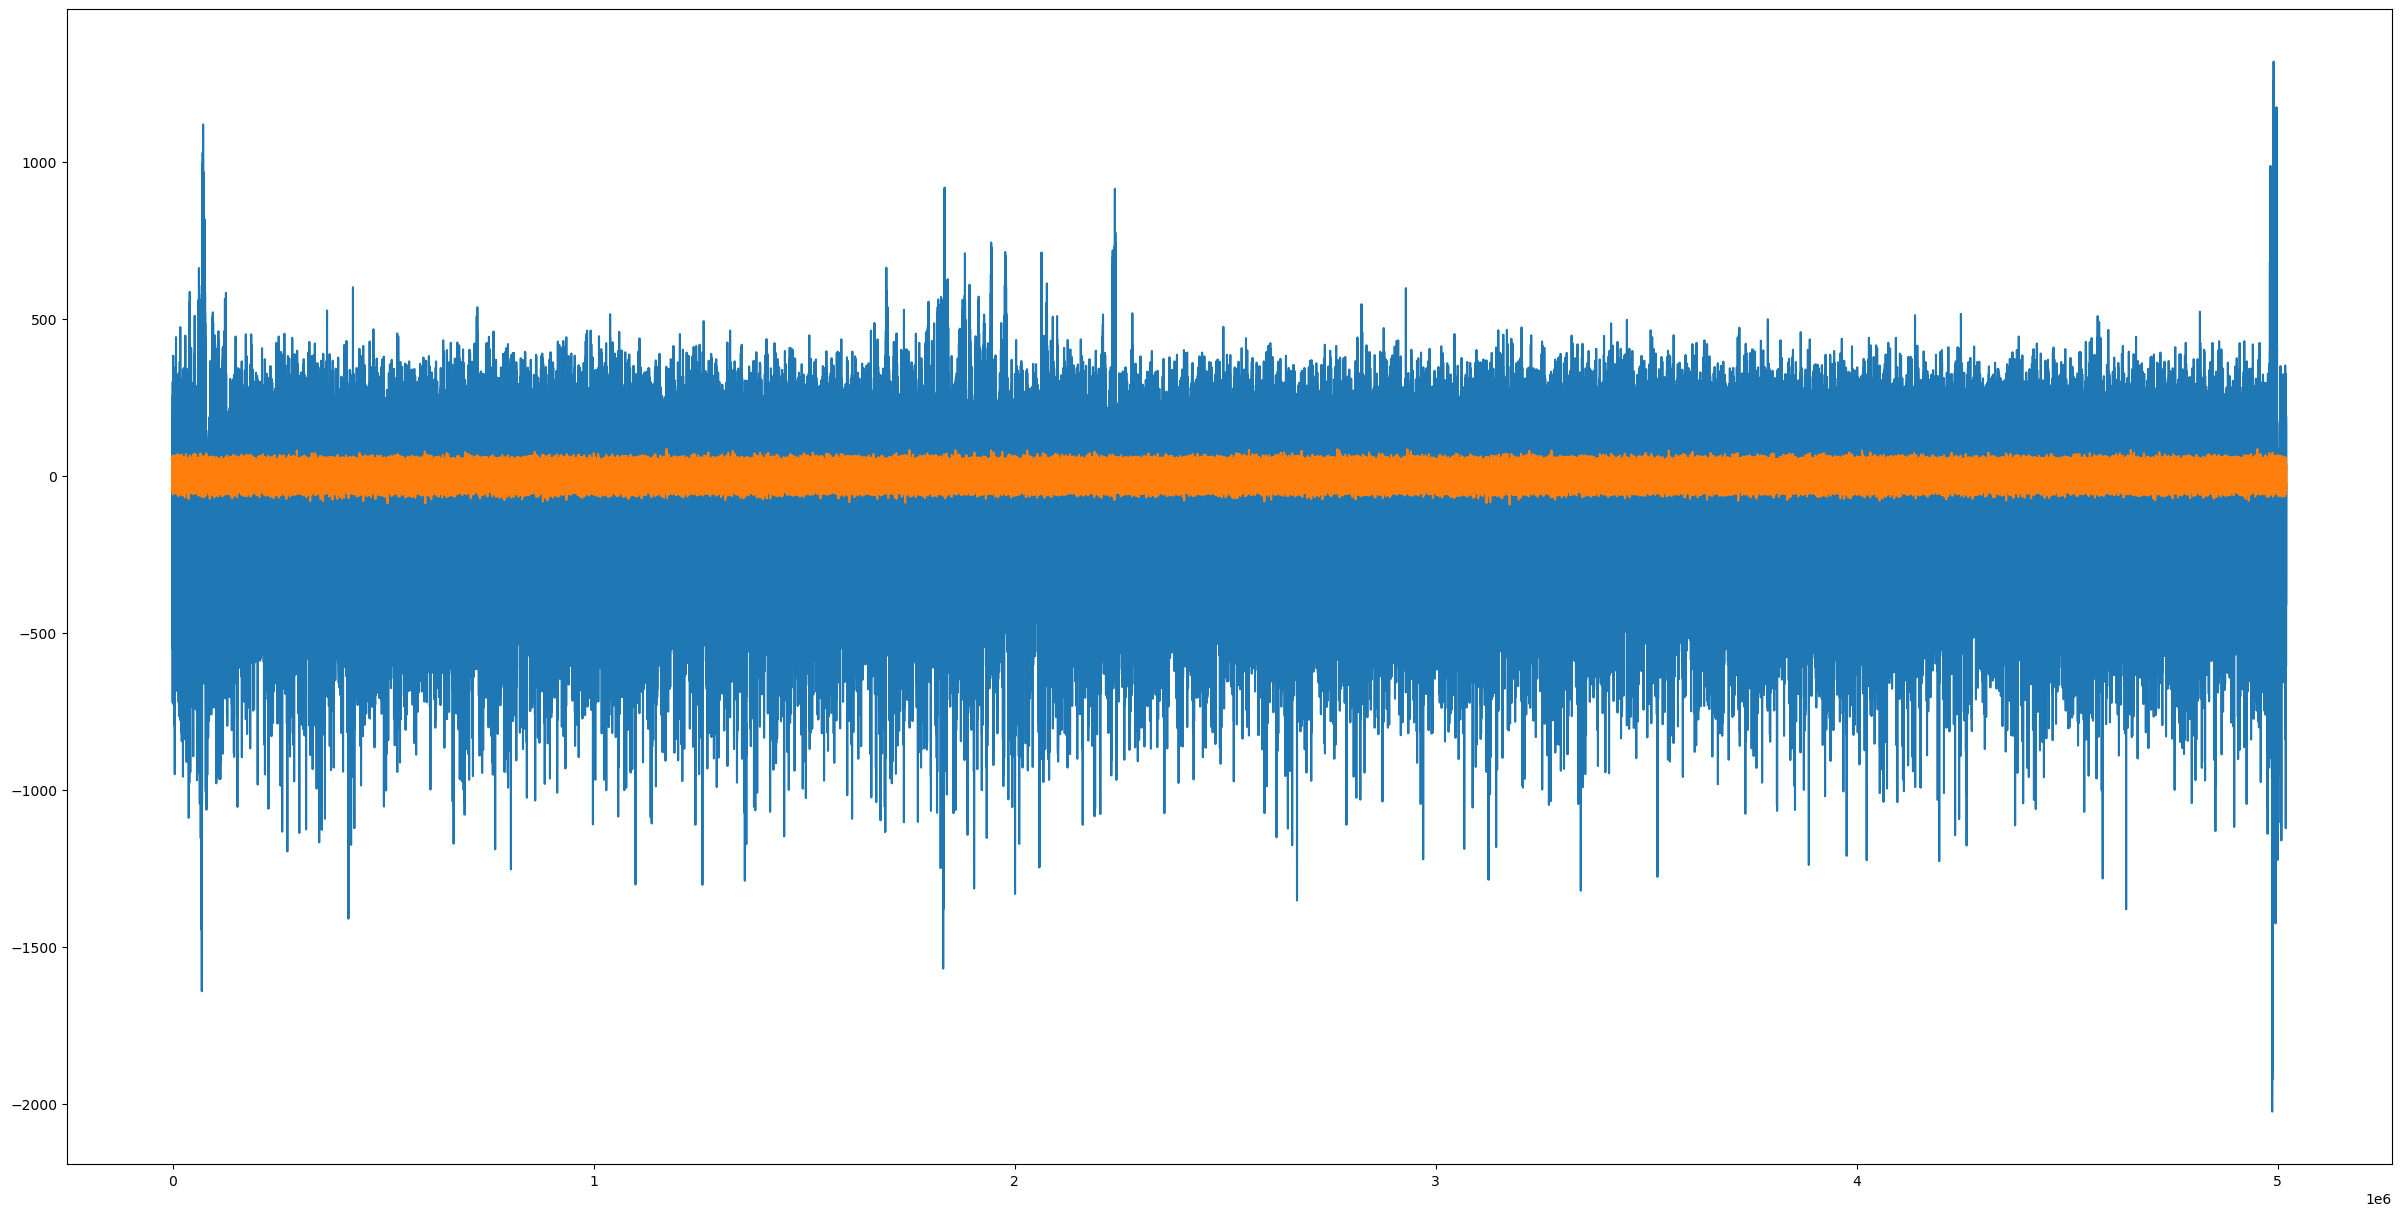

In [9]:
example=b'48'
plt.figure(figsize=(30, 15))
plt.plot(prova[example])
plt.plot(readings[b'Ref'])

In [6]:
freqs, spectrogram = signal.welch(readings[b'Ref'].values, fs=10000, nfft=1024)
noise_freq = freqs[spectrogram.argmax()]
Q = 30
b, a = scipy.signal.iirnotch(noise_freq, Q, fs)
Q = 60
b_2, a_2 = scipy.signal.iirnotch(2*noise_freq, Q, fs)
channel = readings[b'Ref'].values
pre_filtered_ref = scipy.signal.filtfilt(b, a, channel)
pre_filtered_ref = scipy.signal.filtfilt(b_2, a_2, pre_filtered_ref) 



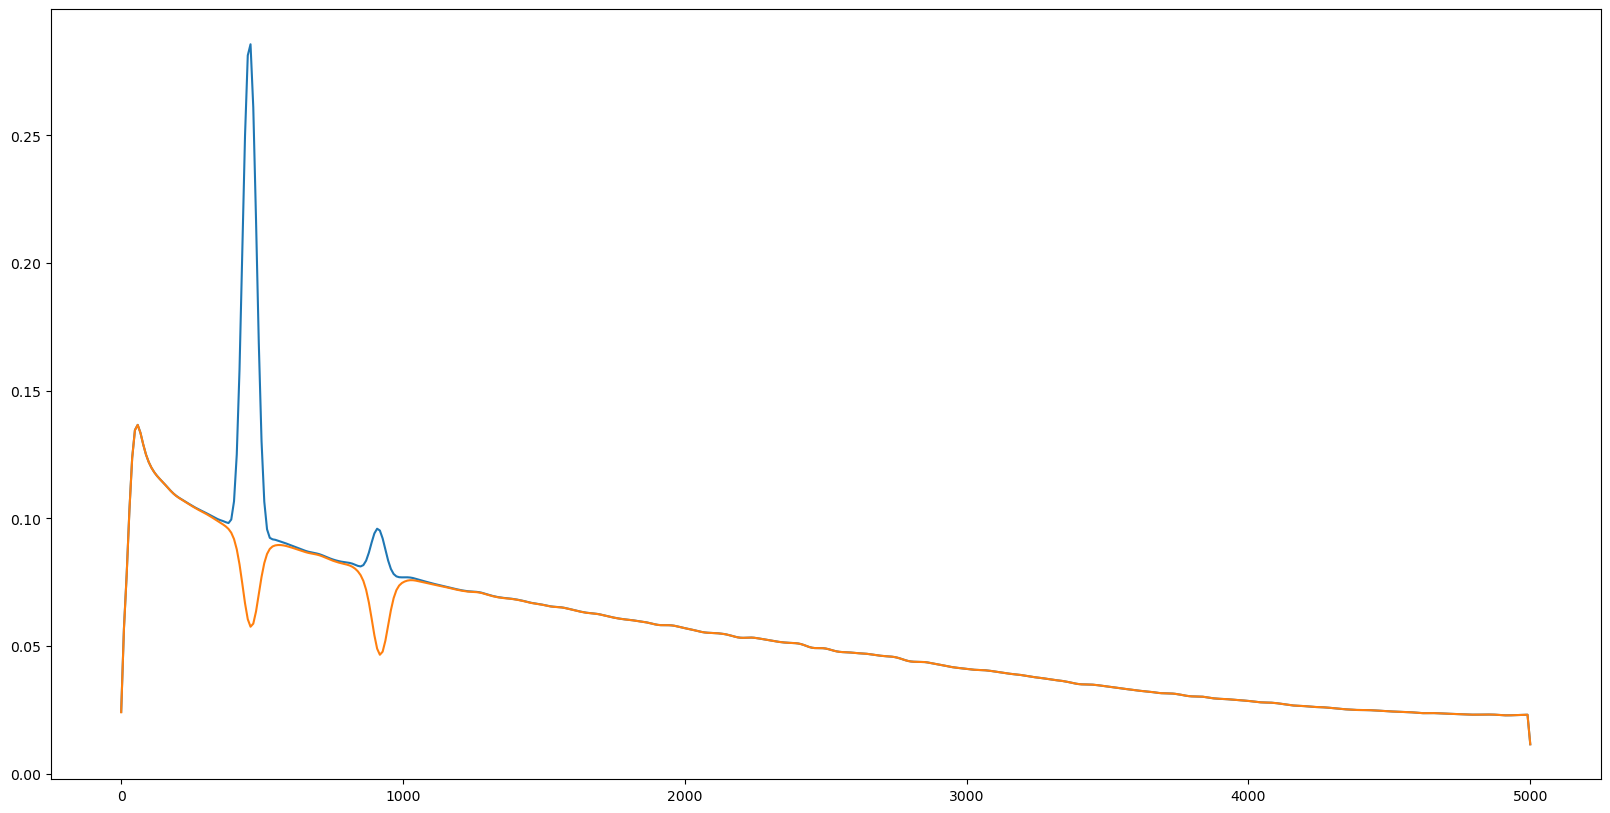

In [11]:
freqs_n, spectrogram_n = signal.welch(pre_filtered_ref, fs=10000, nfft=1024)

plt.figure(figsize=(20,10))
plt.plot(freqs,spectrogram)
plt.plot(freqs_n,spectrogram_n)
#plt.savefig('reference_noise_after.jpg')

In [12]:
noise_freq

458.984375

(3180000.0, 3185000.0, -100.0, 100.0)

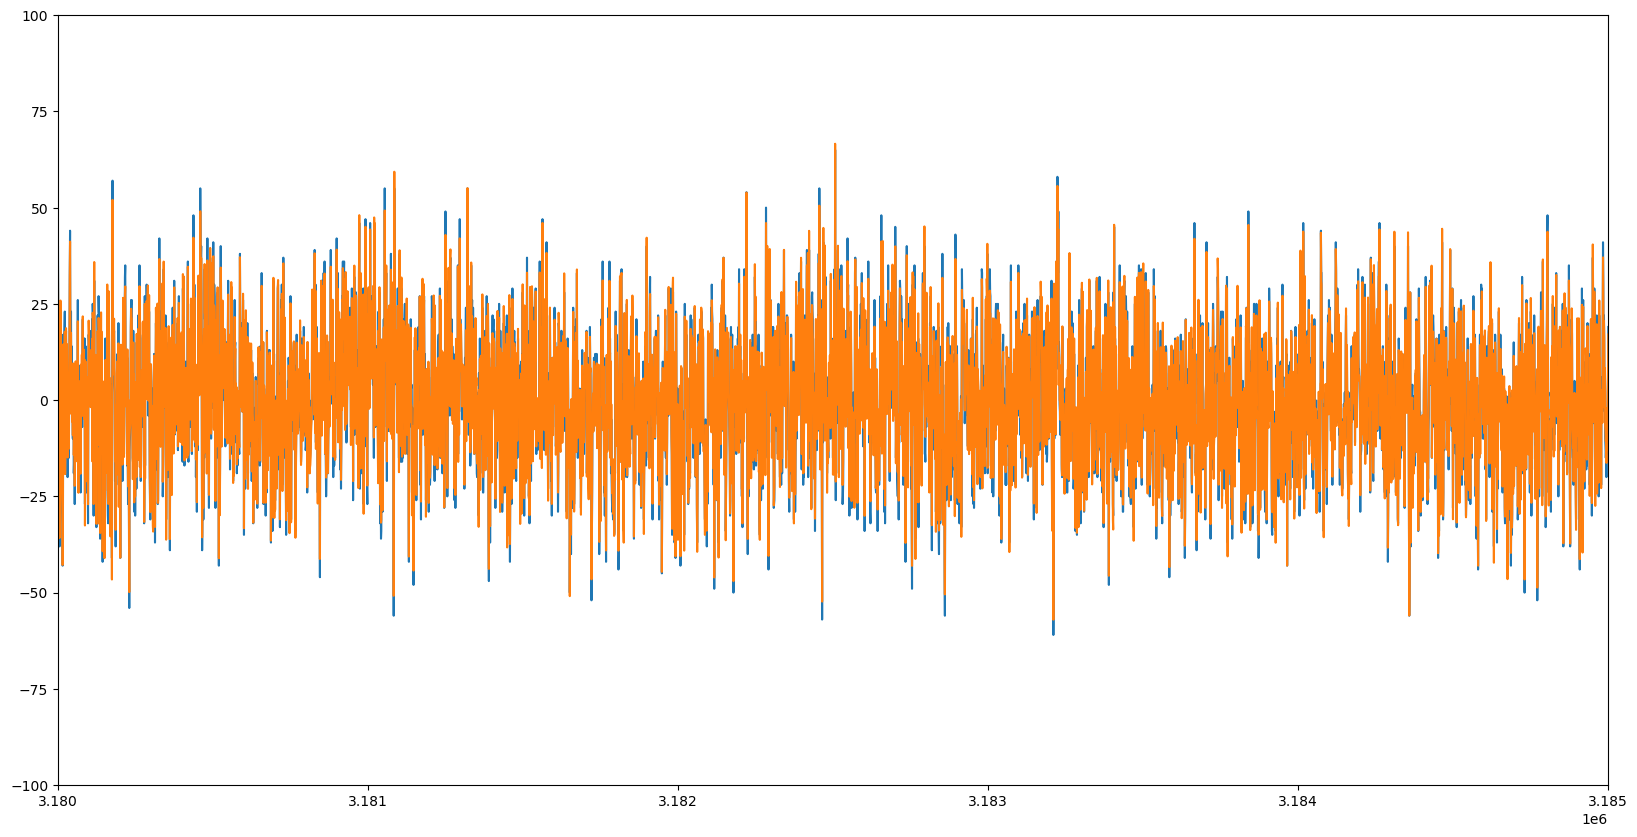

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(ref)
plt.plot(pre_filtered_ref)
plt.axis([3180000,3185000,-100,100])
#plt.savefig('reference_before_after_zoomed.jpg')

In [13]:
ref=pre_filtered_ref

In [14]:
#filtering:
prova_rows = range(prova.shape[0])
filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
lowcut = 300
highcut = 3000
fs=10000
order=8
b,a=butter_bandpass(lowcut,highcut,fs,order=order)
filt_ref=filtfilt(b,a,ref)
print('Data Filtering:')
for x in tqdm(range(prova.shape[1])):
    filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
for electrode in prova.columns:
    filt_prova[electrode] = filt_prova[electrode] - filt_ref
prova=filt_prova


Data Filtering:


  0%|          | 0/59 [00:00<?, ?it/s]

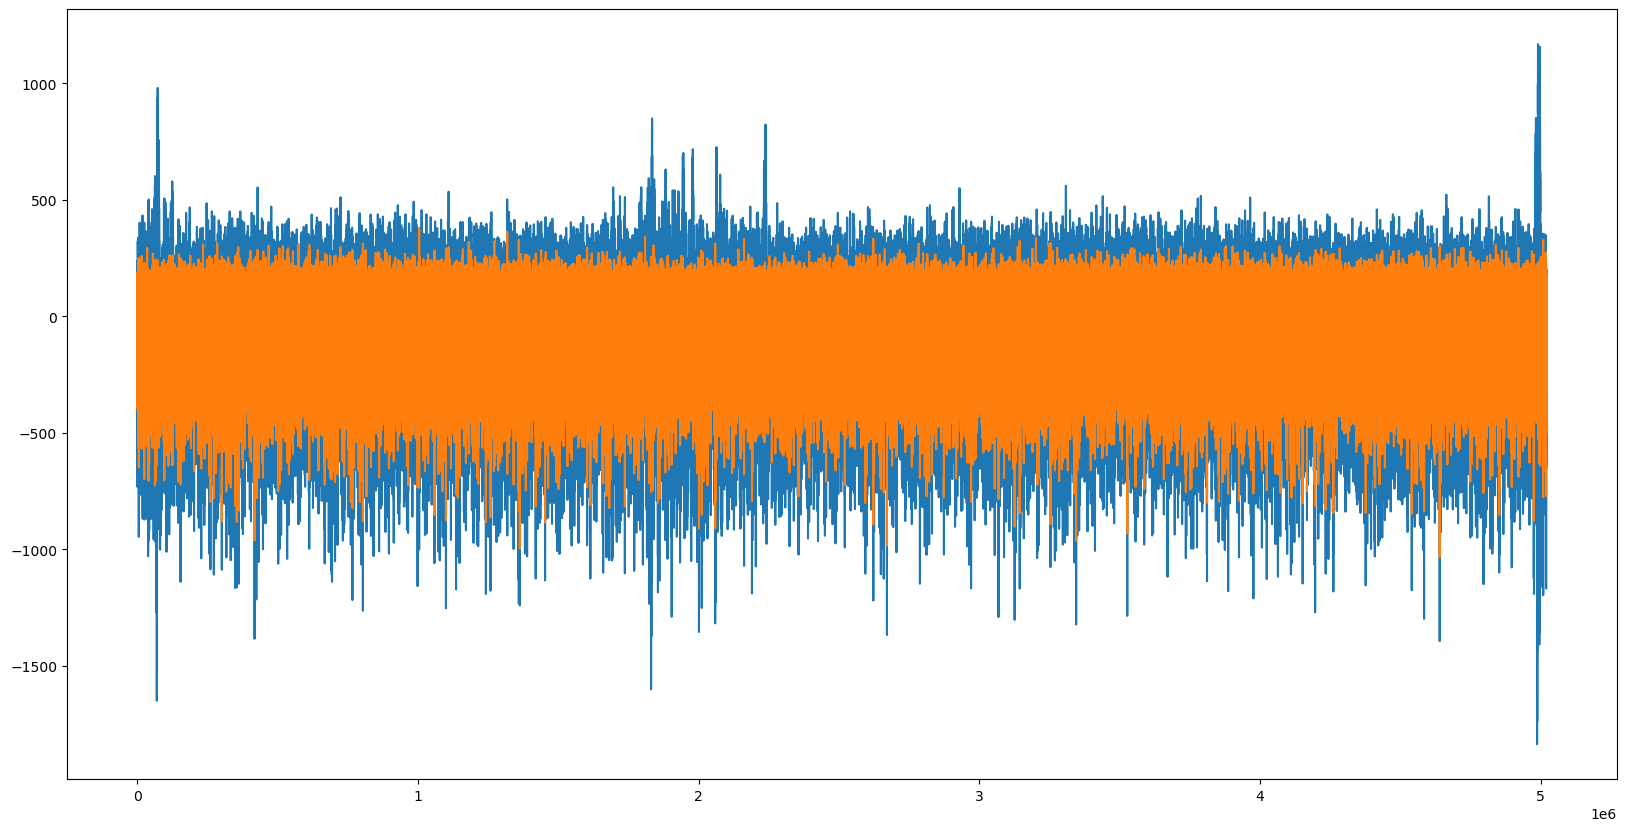

In [29]:
example=b'47'
plt.figure(figsize=(20, 10))
plt.plot(readings[example])
plt.plot(prova[example])
plt.savefig('channel_before_after.jpg')

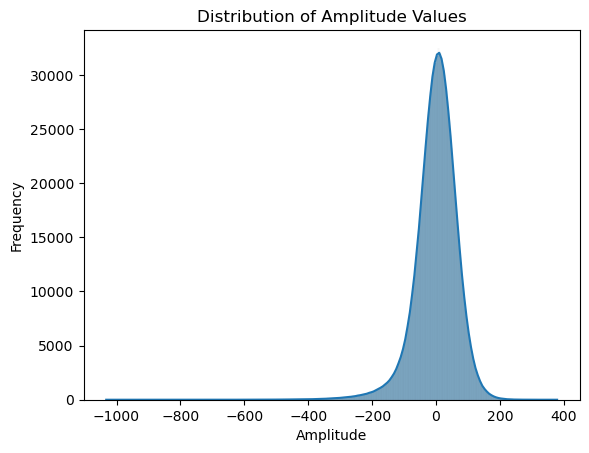

In [16]:
ex=prova[b'47']
sns.histplot(ex, kde=True)
plt.title("Distribution of Amplitude Values")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

55.256935697752105


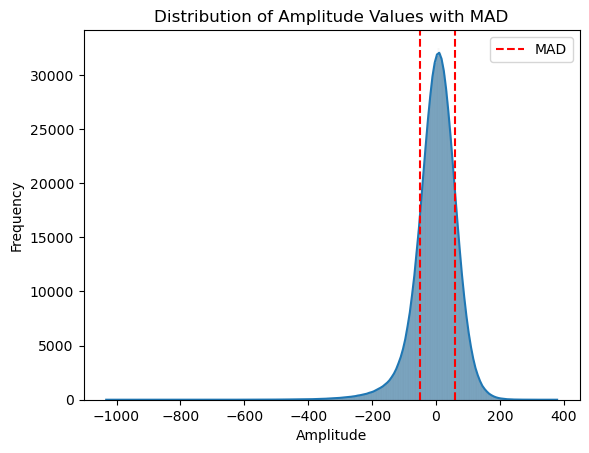

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

# Assuming 'ex' contains your data
# Replace this with your actual data if you have loaded it differently

# Compute MAD with scale='normal'
mad = median_abs_deviation(ex, scale='normal')
print(mad)

# Create histogram plot
sns.histplot(ex, kde=True)

# Plot vertical lines for MAD
plt.axvline(np.median(ex) - mad, color='r', linestyle='--', label='MAD')
plt.axvline(np.median(ex) + mad, color='r', linestyle='--')

plt.title("Distribution of Amplitude Values with MAD")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [54]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset=merged_df
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset


,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
805,0.030000,0.024695,0.059022,0.036943,0.100000,0.106931,0.435041,0.311040,2.539190e-01,0.0,0.0
806,0.030000,0.026658,0.053893,0.049967,0.100000,0.123759,0.376015,0.450747,1.732381e-01,0.0,0.0
807,0.029975,0.025515,0.056269,0.033665,0.102328,0.103310,0.341048,0.360353,2.985997e-01,0.0,0.0
808,0.030000,0.022255,0.052986,0.031594,0.100000,0.098919,0.366657,0.305299,3.280442e-01,0.0,0.0


In [53]:
#dataset=dataset.drop(['Stimulation'],axis=1)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#dataset = pd.read_csv("dataset_after.csv")
#dataset=dataset_after
# Combine "target" and "stimulation" columns to create a new categorical variable
#dataset['class'] = dataset['Target'].astype(int) + dataset['Stimulation'].astype(int)
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


# Split the dataset into features (X) and target variable (y)
X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [59]:
dataset['class'].value_counts()

2    282
1    232
0    173
3    123
Name: class, dtype: int64

In [61]:
dataset['mu1'].isna().sum()

0

Text(0.5, 1.0, 'Histogram')

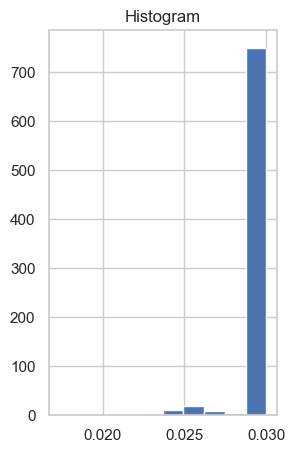

In [64]:
mu1_values = dataset['mu1']

# Plotting histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(mu1_values, density=True, color='b')
plt.title('Histogram')

In [49]:
import glob
list_dir=glob.glob("/Users/Gaia_1/Desktop/Data after SS thresh 3/*.txt")
for file in list_dir:
    file_name = file.split("/")[-1]
    target=1
    stim=0
    if 'healthy' in file_name:
        target=0
    if 'after' in file_name:
        stim=1
    print(len(file),'target',target,'after',stim)
#print(len(list_dir))

102 target 0 after 0
100 target 1 after 1
121 target 0 after 1
99 target 1 after 1
99 target 1 after 1
121 target 0 after 1
88 target 1 after 0
89 target 1 after 0
118 target 0 after 1
89 target 1 after 0
89 target 1 after 0
89 target 1 after 0
101 target 1 after 0
102 target 0 after 0
89 target 1 after 0
89 target 1 after 0
102 target 0 after 0


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

# Assuming 'ex' contains your data
# Replace this with your actual data if you have loaded it differently

# Filter out negative values
ex_neg = ex[ex < 0]

# Compute MAD with scale='normal'
mad = median_abs_deviation(ex, scale='normal')
mad_unscaled = median_abs_deviation(ex)

print(mad,mad_unscaled)

# Compute median
median = np.median(ex)



55.256935697752105 37.270236755377766


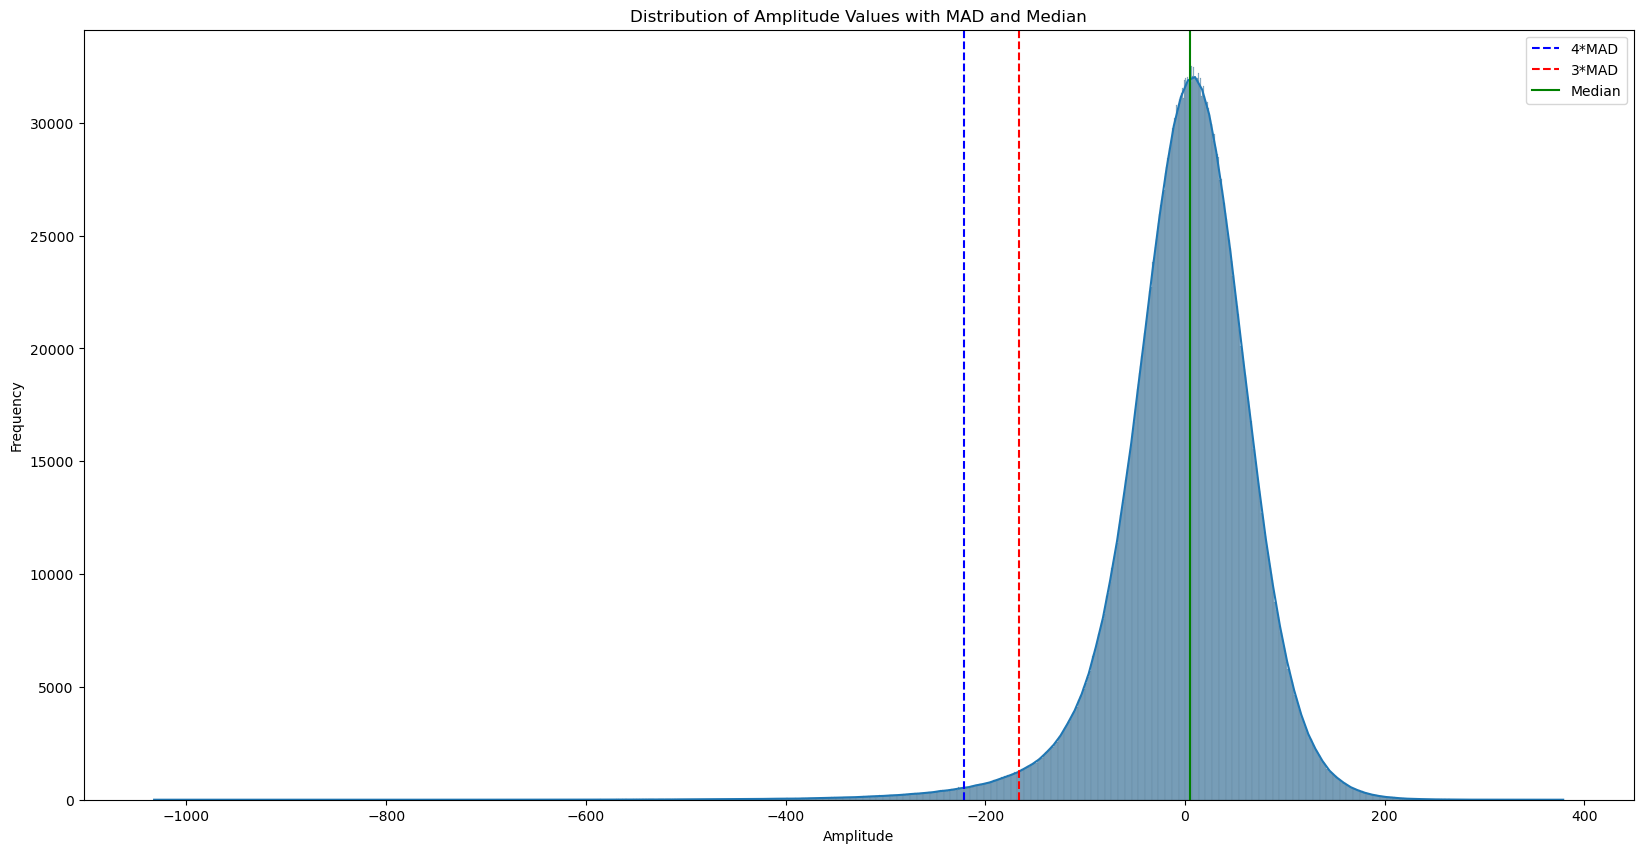

In [48]:
# Create histogram plot
plt.figure(figsize=(20, 10))
sns.histplot(ex, kde=True)

# Plot vertical lines for MAD and median
plt.axvline( -4*mad, color='b', linestyle='--', label='4*MAD')
plt.axvline( -3*mad, color='r', linestyle='--', label='3*MAD')
plt.axvline(median, color='g', linestyle='-', label='Median')
#plt.axvline(-mad_unscaled, color='g', linestyle='--', label='MAD (Unscaled)')

#plt.axis([-400,500,0,35000])

plt.title("Distribution of Amplitude Values with MAD and Median")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('MAD_distribution.jpg')
plt.show()

<Axes: xlabel="b'47'", ylabel='Count'>

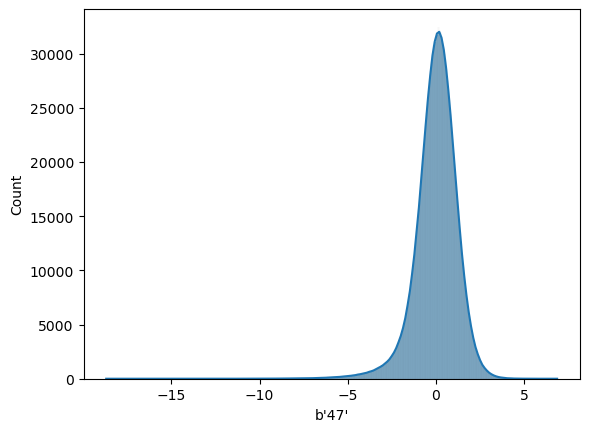

In [21]:
from scipy.stats import median_abs_deviation
mad_scaled = median_abs_deviation(ex, scale='normal')

# Scale the data
scaled_data = ex / mad_scaled

# Create histogram plot
sns.histplot(scaled_data, kde=True)

In [18]:
from scipy.stats import shapiro
statistic, p_value = shapiro(ex)

# Print the results
print("Shapiro-Wilk Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

Shapiro-Wilk Test:
Statistic: 0.9472405314445496
P-value: 0.0
The data does not look Gaussian (reject H0)


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
def this_spike_detection(data):
    spike_length=30 #3ms (0.003s)
    window_length=600000 #1 min (60s)
    neg_data=-(data)
    i=0
    ind=[]
    while i < len(data)-window_length:
        neg_window=neg_data[i:i+window_length]
        window=data[i:i+window_length]
        coeff=3
        thresh=coeff*(scipy.stats.median_abs_deviation(window,scale='normal'))
        ind1, peaks =find_peaks(neg_window, height=thresh,distance=spike_length)
        del peaks
        last=i
        if len(ind1):
            last=i+ind1[-1]
        ind.extend([index + i for index in ind1])
        i=last+spike_length #0.003 s (30ms)
    window = data[last+spike_length:]
    neg_window=-window
    thresh=coeff*(scipy.stats.median_abs_deviation(window,scale='normal'))
    ind1, peaks =find_peaks(neg_window, height=thresh,distance=spike_length)
    ind.extend([index + i for index in ind1])# if index + i < len(data)])

    firing_rate=len(ind)*10000/len(data)
    print(len(ind), ' spikes detected;  ', 'firing rate: {:.2f}'.format(firing_rate),'Hz')
    return ind,firing_rate


In [59]:
#detection:
all_ind=[]
all_firing=[]
print('Spike Detection: ')
for i,electrode in enumerate(tqdm(prova.columns)):
    channel=prova[electrode]
    #ind=windowed_spike_detection(channel)
    ind,firing=this_spike_detection(channel)
    all_ind.append(ind)
    all_firing.append(firing)


Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

47633  spikes detected;   firing rate: 94.89 Hz
48501  spikes detected;   firing rate: 96.62 Hz
49000  spikes detected;   firing rate: 97.61 Hz
48268  spikes detected;   firing rate: 96.15 Hz
48331  spikes detected;   firing rate: 96.28 Hz
32485  spikes detected;   firing rate: 64.71 Hz
31092  spikes detected;   firing rate: 61.94 Hz
37269  spikes detected;   firing rate: 74.24 Hz
33260  spikes detected;   firing rate: 66.25 Hz
33835  spikes detected;   firing rate: 67.40 Hz
31732  spikes detected;   firing rate: 63.21 Hz
30460  spikes detected;   firing rate: 60.68 Hz
27769  spikes detected;   firing rate: 55.32 Hz
27524  spikes detected;   firing rate: 54.83 Hz
22905  spikes detected;   firing rate: 45.63 Hz
24931  spikes detected;   firing rate: 49.66 Hz
26554  spikes detected;   firing rate: 52.90 Hz
29138  spikes detected;   firing rate: 58.04 Hz
28777  spikes detected;   firing rate: 57.32 Hz
27385  spikes detected;   firing rate: 54.55 Hz
33617  spikes detected;   firing rate: 6

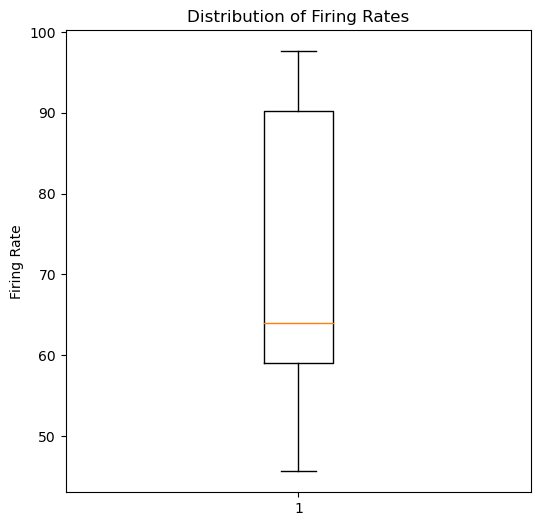

In [60]:
plt.figure(figsize=(6, 6))
plt.boxplot([all_firing])#, labels=[''])
plt.title('Distribution of Firing Rates')
plt.ylabel('Firing Rate')
#plt.savefig('firing_rates_boxplot_sm.jpg')
plt.show()

In [31]:
prova.columns

Index([b'47', b'48', b'46', b'45', b'38', b'37', b'28', b'36', b'27', b'17',
       b'26', b'16', b'35', b'25', b'14', b'24', b'34', b'13', b'23', b'12',
       b'22', b'33', b'21', b'32', b'31', b'44', b'43', b'41', b'42', b'52',
       b'51', b'53', b'54', b'61', b'62', b'71', b'63', b'72', b'82', b'73',
       b'83', b'64', b'74', b'84', b'85', b'75', b'65', b'86', b'76', b'87',
       b'77', b'66', b'78', b'67', b'68', b'55', b'56', b'58', b'57'],
      dtype='object', name='Label')

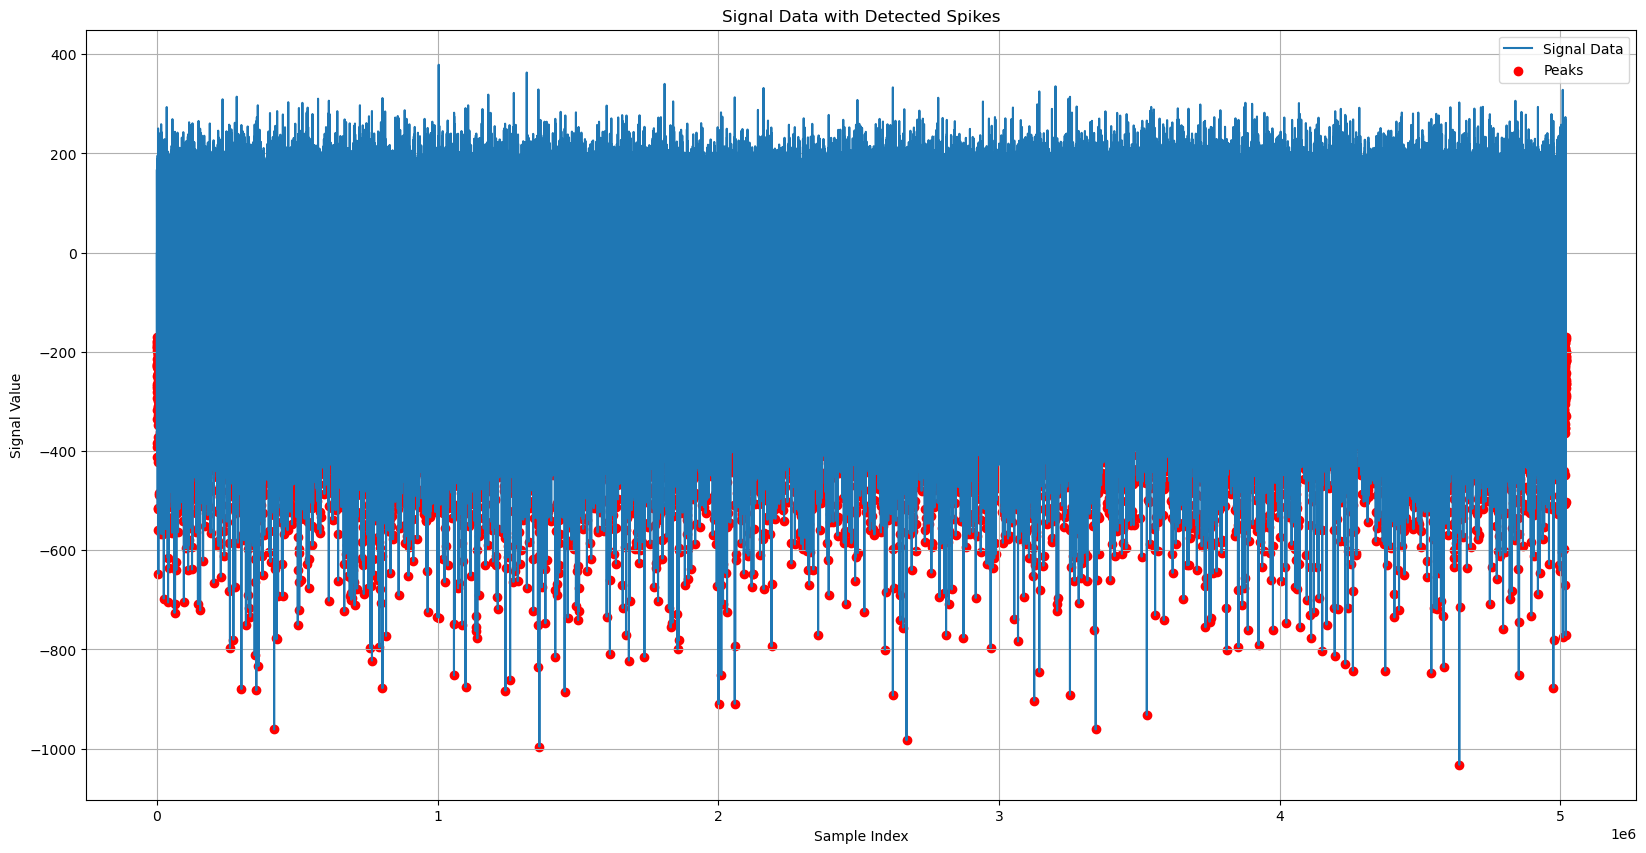

In [38]:
plott=prova[example]
indss=all_ind[0]
plt.figure(figsize=(20, 10))
plt.plot(plott, label='Signal Data')
plt.scatter(indss, [plott[i] for i in indss], c='red', marker='o', label='Peaks')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.title('Signal Data with Detected Spikes')
#plt.axis([4180000,4223000,-800,300])
#plt.savefig('spikes1.jpg')
plt.show()

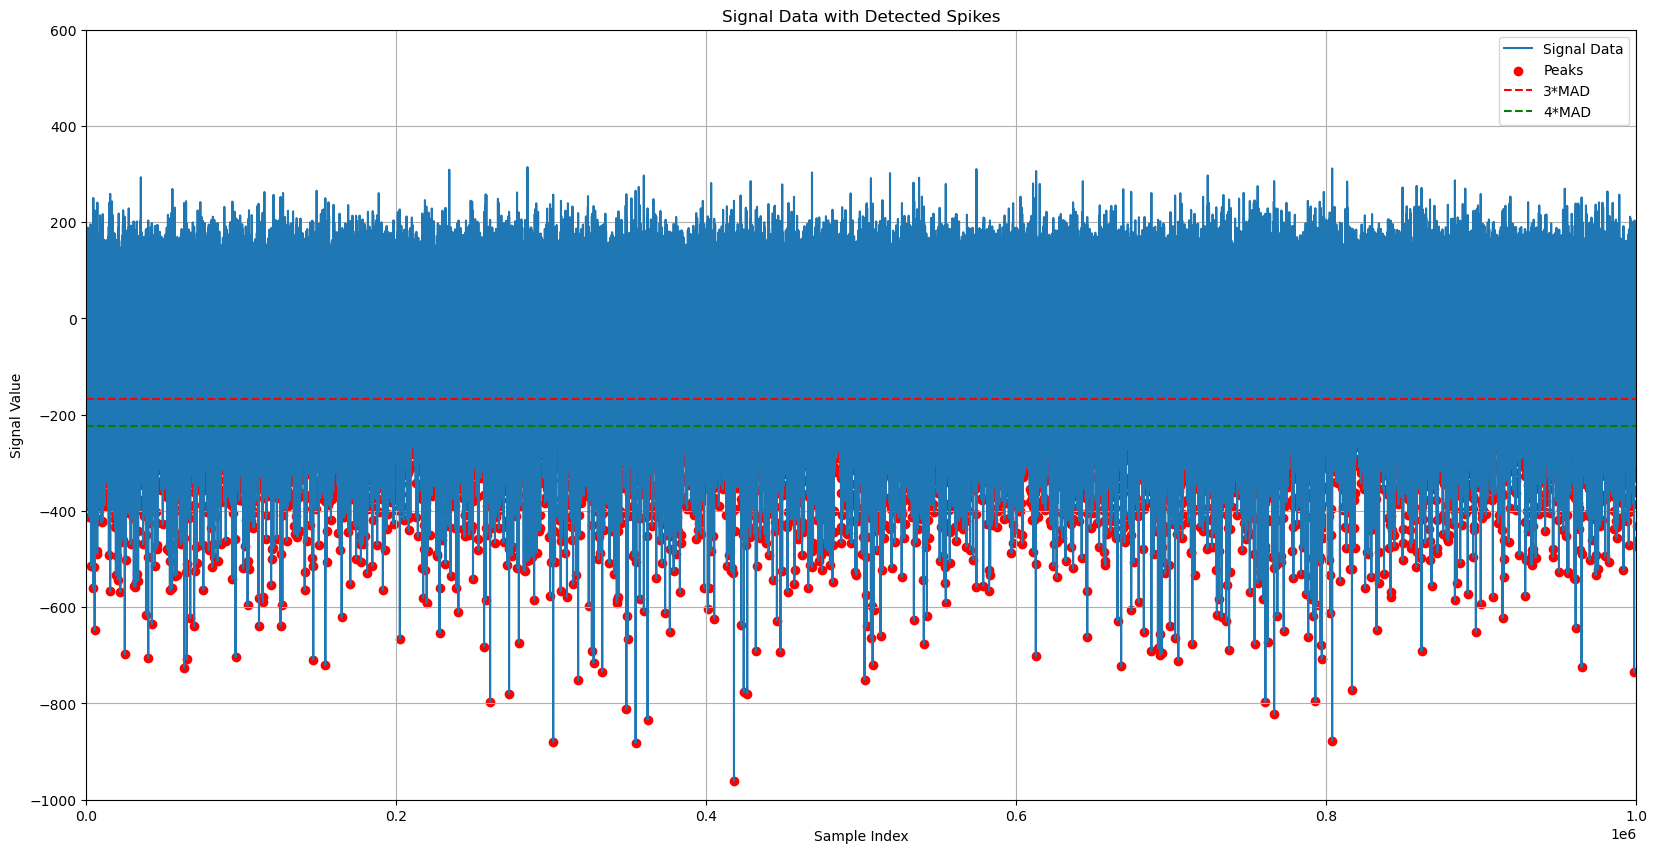

In [55]:
plott=prova[example]
window=plott[0:1000000]
threshold=scipy.stats.median_abs_deviation(window,scale='normal')
indss=all_ind[0]
plt.figure(figsize=(20, 10))
plt.plot(plott, label='Signal Data')
plt.scatter(indss, [plott[i] for i in indss], c='red', marker='o', label='Peaks')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.axhline(y=-3*threshold, color='r', linestyle='--', label='3*MAD')
plt.axhline(y=-4*threshold, color='g', linestyle='--', label='4*MAD')
plt.legend()
plt.grid(True)
plt.title('Signal Data with Detected Spikes')
plt.axis([0,1000000,-1000,600])
plt.savefig('spikes_healthy_1min.jpg')
plt.show()

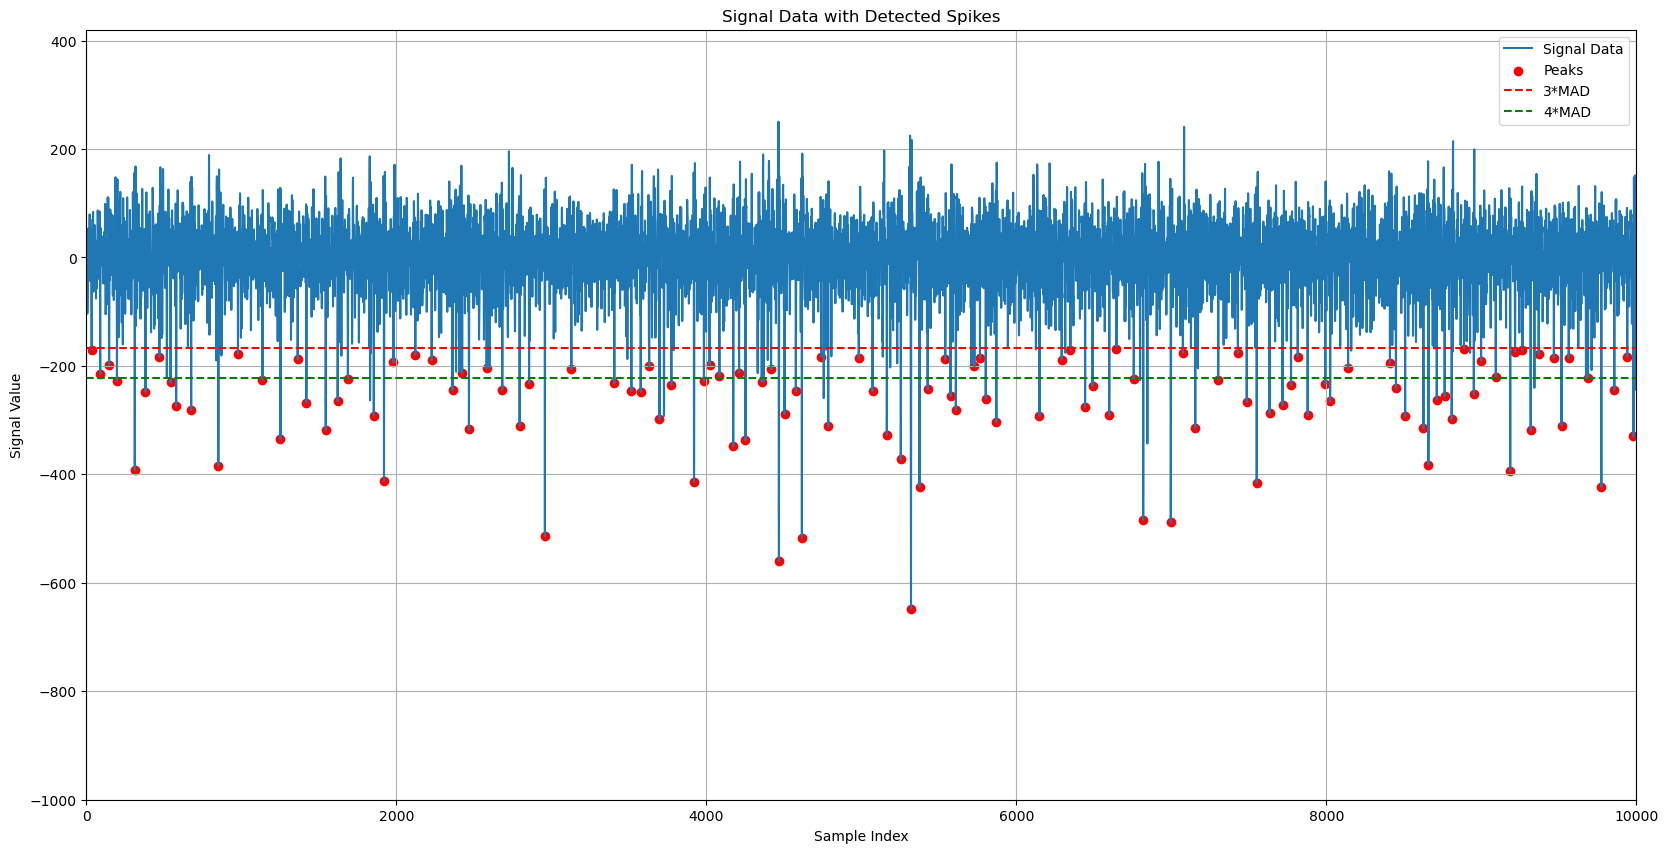

In [52]:
plott=prova[example]
window=plott[0:1000000]
threshold=scipy.stats.median_abs_deviation(window,scale='normal')
indss=all_ind[0]
plt.figure(figsize=(20, 10))
plt.plot(plott, label='Signal Data')
plt.scatter(indss, [plott[i] for i in indss], c='red', marker='o', label='Peaks')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.axhline(y=-3*threshold, color='r', linestyle='--', label='3*MAD')
plt.axhline(y=-4*threshold, color='g', linestyle='--', label='4*MAD')
plt.legend()
plt.grid(True)
plt.title('Signal Data with Detected Spikes')
plt.axis([0,10000,-1000,420])
#plt.savefig('spikes_healthy_1min.jpg')
plt.show()

In [56]:
#spike extraction:
cut_outs=[]
all_new=[]
print('Spike extraction: ')
for i,electrode in enumerate(tqdm(prova.columns)):
    ind=all_ind[i]
    channel=prova[electrode]
    cut_outs1,all_new1=cut_all(ind,channel)
    cut_outs.append(cut_outs1)
    all_new.append(all_new1)    


Spike extraction: 


  0%|          | 0/59 [00:00<?, ?it/s]

/Users/Gaia_1/Desktop/tesi/NewLibraryENGcopia.py:190: RuntimeWarning: invalid value encountered in divide
  standardized_cuts=(filtered_cut-spike_means)/spike_stds


33038  spikes removed;   firing rate: 29.07 Hz
33676  spikes removed;   firing rate: 29.53 Hz
34149  spikes removed;   firing rate: 29.58 Hz
33540  spikes removed;   firing rate: 29.34 Hz
33478  spikes removed;   firing rate: 29.59 Hz
22900  spikes removed;   firing rate: 19.09 Hz
23351  spikes removed;   firing rate: 15.42 Hz
26488  spikes removed;   firing rate: 21.48 Hz
24972  spikes removed;   firing rate: 16.51 Hz
23805  spikes removed;   firing rate: 19.98 Hz
25007  spikes removed;   firing rate: 13.40 Hz
23981  spikes removed;   firing rate: 12.91 Hz
21822  spikes removed;   firing rate: 11.85 Hz
21533  spikes removed;   firing rate: 11.93 Hz
17707  spikes removed;   firing rate: 10.35 Hz
19398  spikes removed;   firing rate: 11.02 Hz
20800  spikes removed;   firing rate: 11.46 Hz
22802  spikes removed;   firing rate: 12.62 Hz
22544  spikes removed;   firing rate: 12.42 Hz
21449  spikes removed;   firing rate: 11.82 Hz
25317  spikes removed;   firing rate: 16.53 Hz
24313  spikes

In [ ]:
cut_outs[0]

In [1]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import sklearn.preprocessing as ps
from sklearn.preprocessing import StandardScaler
from random import randint
from fastdtw import fastdtw
import copy
import pymc as pm
from gettext import find
import sys, importlib
from  McsPy.McsData import RawData
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import h5py
import scipy
import pywt
#from tqdm import tqdm
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import time
from scipy.signal import butter, filtfilt
from scipy import signal



def spike_sorting(input_path,output_path):
    name_data = input_path.split("/")[-1]
    #file reading:
    print('File Reading...')
    data = h5py.File(input_path,'r')
    data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
    info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
    info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
    labels = info_table['Label']
    readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
    fs = 10000 #Sampling Frequency
    print('data shape: ',readings.shape)
    prova=readings.drop([b'Ref'],axis=1)
    #prova=prova.iloc[0:750500, :]
    #prova=prova.iloc[:, :15]
    ref=readings[b'Ref']
    #ref=ref[0:750500]
    freqs, spectrogram = signal.welch(readings[b'Ref'].values, fs=10000, nfft=1024)
    noise_freq = freqs[spectrogram.argmax()]
    Q = 30
    b, a = scipy.signal.iirnotch(noise_freq, Q, fs)
    Q = 60
    b_2, a_2 = scipy.signal.iirnotch(2*noise_freq, Q, fs)
    channel = readings[b'Ref'].values
    pre_filtered_ref = scipy.signal.filtfilt(b, a, channel)
    pre_filtered_ref = scipy.signal.filtfilt(b_2, a_2, pre_filtered_ref) 
    ref=pre_filtered_ref

    #filtering:
    prova_rows = range(prova.shape[0])
    filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
    lowcut = 300
    highcut = 3000
    fs=10000
    order=8
    b,a=butter_bandpass(lowcut,highcut,fs,order=order)
    filt_ref=filtfilt(b,a,ref)
    print('Data Filtering:')
    for x in tqdm(range(prova.shape[1])):
        filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
    for electrode in prova.columns:
        filt_prova[electrode] = filt_prova[electrode] - filt_ref
    prova=filt_prova
    #detection:
    all_ind=[]
    print('Spike Detection: ')
    for i,electrode in enumerate(tqdm(prova.columns)):
        channel=prova[electrode]
        #ind=windowed_spike_detection(channel)
        ind=spike_detection(channel)
        all_ind.append(ind)
    #spike extraction:
    cut_outs=[]
    all_new=[]
    print('Spike extraction: ')
    for i,electrode in enumerate(tqdm(prova.columns)):
        ind=all_ind[i]
        channel=prova[electrode]
        cut_outs1,all_new1=cut_all(ind,channel)
        cut_outs.append(cut_outs1)
        all_new.append(all_new1)    
    # Clustering:
    final_data=[]
    final_firing=[]
    final_firing.append(name_data)
    print('Clustering: ')
    for channel in (tqdm(range(len(cut_outs)))):
        channel_clusters1,final_firing1=clus(cut_outs[channel],all_new[channel],prova.iloc[:,channel])
        final_data.append(channel_clusters1)
        final_firing.append(final_firing1)
    neurons=[]
    for channel in final_data:
        for neuron in channel:
            neurons.append(neuron)
    print(len(neurons),' neurons detected and sorted')
    adj_neur=[]
    counter = 0
    max_len=0
    for neuron in neurons:
        print('counter: ',counter,neuron.shape[0])
        if neuron.shape[0]>max_len:
            max_len=neuron.shape[0]
        counter+=1
    for neuron in neurons:
        if neuron.shape[0]<max_len:
            diff = max_len-neuron.shape[0]
            adj_neur.append(np.concatenate((neuron,np.zeros([diff]))))
    save_data = 'After'+name_data+'.txt'
    #np.savetxt("/Users/Gaia_1/Desktop/tesi/Data after SS/%s.txt" % save_data,adj_neur, delimiter=', ', fmt='%12.8f')
    np.savetxt(f"{output_path}/{save_data}.txt", adj_neur, delimiter=', ', fmt='%12.8f')

    print('saved: ',save_data)
    return neurons, final_firing
